In [5]:
import os
import random
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import preprocess_input

In [11]:
os.chdir('D:/study/data/dogcat')
if os.path.isdir('/train') is False:
    os.makedirs('train/dogs')
    os.makedirs('train/cats')
    os.makedirs('valid/dogs')
    os.makedirs('valid/cats')
    os.makedirs('test/dogs')
    os.makedirs('test/cats')

In [12]:
import shutil

# Define paths to the folders containing dog and cat images
dog_folder = 'D:\\study\\data\\dogcat\\dogs'
cat_folder = 'D:\\study\\data\\dogcat\\cats'

# Get list of all image files in each folder
dog_images = [f for f in os.listdir(dog_folder) if f.endswith(('.jpg', '.png'))]
cat_images = [f for f in os.listdir(cat_folder) if f.endswith(('.jpg', '.png'))]

# Ensure there are enough images in each category
if len(dog_images) < 500 or len(cat_images) < 500:
    raise ValueError("Not enough images in one or both categories.")

# Randomly select 500 images from each category
selected_dogs = random.sample(dog_images, 500)
selected_cats = random.sample(cat_images, 500)

# Optional: Create a directory to store the selected images
output_dir_train_dog = 'D:\\study\\data\\dogcat\\train\\dogs'
output_dir_train_cat = 'D:\\study\\data\\dogcat\\train\\cats'


# Copy the selected images to the new folder
for img in selected_dogs:
    shutil.copy(os.path.join(dog_folder, img), os.path.join(output_dir_train_dog, img))

for img in selected_cats:
    shutil.copy(os.path.join(cat_folder, img), os.path.join(output_dir_train_cat, img))

print("500 dog images and 500 cat images have been selected and copied.")

selected_dogs_valid = random.sample(dog_images, 100)
selected_cats_valid = random.sample(cat_images, 100)

output_dir_valid_dog = 'D:\\study\\data\\dogcat\\valid\\dogs'
output_dir_valid_cat = 'D:\\study\\data\\dogcat\\valid\\cats'

# Copy the selected images to the new folder
for img in selected_dogs_valid:
    shutil.copy(os.path.join(dog_folder, img), os.path.join(output_dir_valid_dog, img))

for img in selected_cats_valid:
    shutil.copy(os.path.join(cat_folder, img), os.path.join(output_dir_valid_cat, img))

print("100 dog images and 100 cat images have been selected and copied.")

selected_dogs_test = random.sample(dog_images, 50)
selected_cats_test = random.sample(cat_images, 50)

output_dir_test_dog = 'D:\\study\\data\\dogcat\\test\\dogs'
output_dir_test_cat = 'D:\\study\\data\\dogcat\\test\\cats'

# Copy the selected images to the new folder
for img in selected_dogs_test:
    shutil.copy(os.path.join(dog_folder, img), os.path.join(output_dir_test_dog, img))

for img in selected_cats_test:
    shutil.copy(os.path.join(cat_folder, img), os.path.join(output_dir_test_cat, img))

print("50 dog images and 50 cat images have been selected and copied.")

500 dog images and 500 cat images have been selected and copied.
100 dog images and 100 cat images have been selected and copied.
50 dog images and 50 cat images have been selected and copied.


In [6]:
train_path = 'D:\\study\\data\\dogcat\\train'
valid_path = 'D:\\study\\data\\dogcat\\valid'
test_path = 'D:\\study\\data\\dogcat\\test'

In [15]:
train_batch = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(directory=train_path,target_size=(244,244),classes=['dogs','cats'],batch_size=10)
validate_batch = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(directory=valid_path,target_size=(244,244),classes=['dogs','cats'],batch_size=10)
test_batch = ImageDataGenerator(preprocessing_function=preprocess_input).flow_from_directory(directory=test_path,target_size=(244,244),classes=['dogs','cats'],batch_size=10)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [32]:
assert train_batch.n == 1000,"error"
assert validate_batch.n == 200,"error"
assert test_batch.n == 100,"error"

In [23]:
img,labels = next(train_batch)

In [27]:
img.shape

(10, 244, 244, 3)

In [28]:
labels.shape

(10, 2)

In [33]:
def plot_image(image):
    plt.imshow(image.astype('uint8'))  # Convert pixel values to integers if necessary
    plt.title("Sample Image from Batch")
    plt.axis('off')  # Turn off axis labels
    plt.show()
    

In [50]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(244,244,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(2,activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 242, 242, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 121, 121, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 119, 119, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 59, 59, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 111392)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       7,129,152 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,139,426 (27.23 MB)

 Trainable params: 7,139,426 (27.23 MB)

 Non-trainable params: 0 (0.00 B)

In [52]:
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [53]:
model.fit(x=train_batch,validation_data=validate_batch,epochs=10)

Epoch 1/10


C:\Users\swaroop\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


100/100 ━━━━━━━━━━━━━━━━━━━━ 38s 349ms/step - accuracy: 0.5431 - loss: 55.6346 - val_accuracy: 0.5400 - val_loss: 0.6930
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 237ms/step - accuracy: 0.7790 - loss: 0.6417 - val_accuracy: 0.5500 - val_loss: 0.6893
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 231ms/step - accuracy: 0.8610 - loss: 0.4360 - val_accuracy: 0.6300 - val_loss: 0.6875
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 227ms/step - accuracy: 0.9625 - loss: 0.1436 - val_accuracy: 0.6250 - val_loss: 0.9805
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 233ms/step - accuracy: 0.9959 - loss: 0.0351 - val_accuracy: 0.5850 - val_loss: 1.5082
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 232ms/step - accuracy: 0.9996 - loss: 0.0076 - val_accuracy: 0.6150 - val_loss: 1.4484
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 24s 238ms/step - accuracy: 1.0000 - loss: 0.0036 - val_accuracy: 0.5950 - val_loss: 1.6235
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 23s 230ms/step - accuracy: 0.9727 - loss: 0.3476 - va

In [67]:
test_batch.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [72]:
img,label = next(test_bacth)

array([[[[  24.060997 ,    3.2210007,    3.3199997],
         [  20.060997 ,   -0.7789993,   -0.6800003],
         [  19.060997 ,   -1.7789993,   -1.6800003],
         ...,
         [  -0.939003 ,  -20.779    ,  -24.68     ],
         [   1.060997 ,  -18.779    ,  -22.68     ],
         [   1.060997 ,  -18.779    ,  -22.68     ]],

        [[  22.060997 ,    1.2210007,    1.3199997],
         [  18.060997 ,   -2.7789993,   -2.6800003],
         [  17.060997 ,   -3.7789993,   -3.6800003],
         ...,
         [   2.060997 ,  -17.779    ,  -21.68     ],
         [   4.060997 ,  -15.778999 ,  -19.68     ],
         [   4.060997 ,  -15.778999 ,  -19.68     ]],

        [[  22.060997 ,    1.2210007,    1.3199997],
         [  18.060997 ,   -2.7789993,   -2.6800003],
         [  17.060997 ,   -3.7789993,   -3.6800003],
         ...,
         [  -2.939003 ,  -22.779    ,  -26.68     ],
         [  -2.939003 ,  -22.779    ,  -26.68     ],
         [  -3.939003 ,  -23.779    ,  -27.68     ]],

In [77]:
prediction = model.predict(x = img)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step


In [92]:
model.evaluate(img,label)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.7000 - loss: 0.6675


[0.6674945950508118, 0.699999988079071]

In [79]:
predicted_classes = (prediction > 0.5).astype("int").flatten()

In [80]:
predicted_classes

array([1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0])

In [81]:
if label.shape[1] == 2:  # One-hot encoded
    true_classes = np.argmax(label, axis=1)
else:
    true_classes = label

In [82]:
true_classes

array([0, 0, 1, 1, 0, 1, 0, 1, 0, 0], dtype=int64)

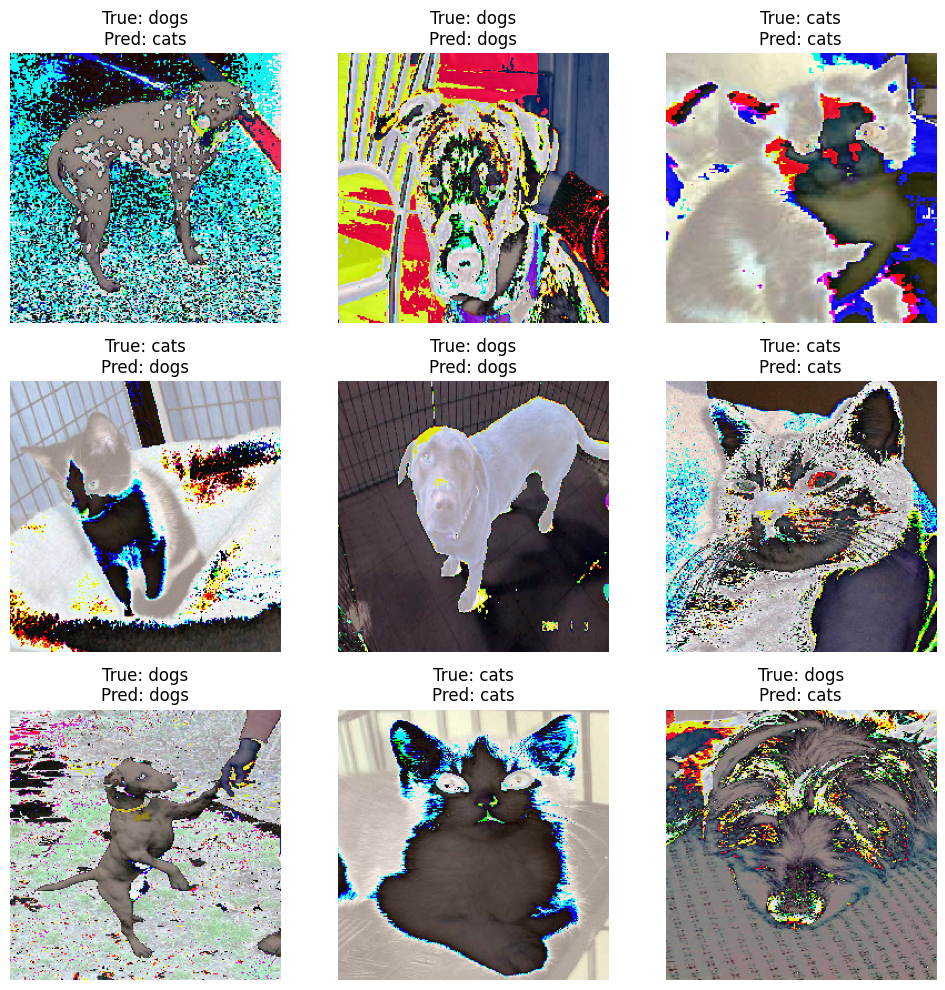

In [87]:
class_names = ['dogs', 'cats']
plt.figure(figsize=(10, 10))
for i in range(9):  # Display first 9 images
    plt.subplot(3, 3, i + 1)
    plt.imshow(img[i].astype("uint8"))  # Display the image
    true_label = class_names[true_classes[i]]
    pred_label = class_names[predicted_classes[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()